In [ ]:

# Download latest version
# path = kagglehub.dataset_download("pedrocouto39/jane-street-market-train-data-best-formats")

# print("Path to dataset files:", path)

In [26]:
import pandas as pd
import polars as pl
import numpy as np
import torch

# Data Preprocessing

In [27]:
path = "./data/jane_street_train.parquet"
# df = pd.read_feather(path=path)
df = pd.read_parquet(path)
print(df.info())
print(df[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB
None
   date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   
5     0   0.000000 -0.001047 -0.002700  0.000743  0.004667  0.001282   
6     0   0.190575 -0.001939 -0.002301  0.001088  0.005963  0.000709   
7     0   3.820844  0.017395  0.021361  0.031163  0.036970  0.033473   
8     0   0.116557 -0.005460 -0.007301 -0.009085 -0.003546 -0.001677   
9     0   0.160117  0.005976  0.004345  0.023712  0.035360  0.020317   

   feature_0  feature_1  feature_2

In [ ]:
lf = pl.scan_parquet(path)


In [23]:
df[:10]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
5,0,0.000000,-0.001047,-0.002700,0.000743,0.004667,0.001282,-1,-1.499681,-1.928023,...,NaN,0.337112,4.079450,0.613967,6.622410,0.799525,5.231833,0.360831,3.922324,5
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,-1,-3.172026,-3.093182,...,NaN,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,6
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,-1,0.446050,-0.466210,...,NaN,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,7
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,NaN,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8
9,0,0.160117,0.005976,0.004345,0.023712,0.035360,0.020317,1,2.744408,1.412127,...,NaN,1.796860,3.177064,0.999252,2.906432,1.589816,2.435999,1.472419,2.245991,9


In [26]:
df[-1:]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
2390490,499,0.0,-0.001855,-0.001855,-0.001194,-0.000864,-0.001905,-1,-1.817184,-1.131577,...,-0.571013,2.483421,8.284037,-0.698486,0.199953,-0.168395,2.051091,1.726072,5.823676,2390490


In [26]:
df.head().to_csv()

',date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,featur

In [24]:
np_arr = df.to_numpy()
t = torch.tensor(np_arr)
t.shape

torch.Size([2390491, 138])

In [5]:
nan_count = np.isnan(t).sum()

In [6]:
print(nan_count)
print(nan_count/(t.shape[0]*t.shape[1]))

tensor(6762701)
tensor(0.0205)


In [7]:
def preprocess(df:pd.DataFrame):
    feature_columns = [c for c in df.columns if c.startswith("feature_")]
    final_target_column = ["resp"]
    target_columns = ["resp_1", "resp_2", "resp_3", "resp_4"]
    all_cols = ["ts_id", "date"] + feature_columns + target_columns + final_target_column

    df = df[all_cols].sort_values(["ts_id", "date"])

    # 3. Pivot so every (ts_id, date) slot exists -------------------------------
    #   (this makes missing dates explicit → NaNs we can ffill / mask)
    dates = np.sort(df.date.unique())
    securities = np.sort(df.ts_id.unique())

    tensor = (
        df.set_index(["ts_id", "date"])
        .reindex(pd.MultiIndex.from_product([securities, dates]))
        .sort_index()
    )

    # 4. Separate inputs & targets ----------------------------------------------
    X = tensor[feature_columns].to_numpy(dtype=np.float32)            # shape (N_sec * N_day, 130)
    y = tensor[target_columns].to_numpy(dtype=np.float32)          # shape (N_sec * N_day, 1)

    # 5. Reshape to (sec, day, chan)
    N_sec, N_day = len(securities), len(dates)
    X = X.reshape(N_sec, N_day, len(feature_columns))
    y = y.reshape(N_sec, N_day, len(target_columns))


### Testing of preprocess 

In [9]:
df.columns
lst = ["feature_1", "feature_2"]
df[lst]
df.date.unique().shape
df.ts_id.unique().shape

dates = np.sort(df.date.unique())
securities = np.sort(df.ts_id.unique())
tensor = (df.set_index(["date", "ts_id"]))
tensor

weight    resp_1    resp_2    resp_3    resp_4      resp  \
date ts_id                                                                  
0    0         0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
     1        16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
     2         0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
     3         0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
     4         0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   
...                 ...       ...       ...       ...       ...       ...   
499  2390486   0.000000  0.000142  0.000142  0.005829  0.020342  0.015396   
     2390487   0.000000  0.000012  0.000012 -0.000935 -0.006326 -0.004718   
     2390488   0.000000  0.000499  0.000499  0.007605  0.024907  0.016591   
     2390489   0.283405 -0.000156 -0.000156 -0.001375 -0.003702 -0.002004   
     2390490   0.000000 -0.001855 -0.001855 -0.001194 -0.000864 -0.001905   

              feature_0  feature_1  feature_2  feature_3  ...  feature_120  \
date ts_id                                                ...                
0    0                1  -1.872746  -2.191242  -0.474163  ...          NaN   
     1               -1  -1.349537  -1.704709   0.068058  ...          NaN   
     2               -1   0.812780  -0.256156   0.806463  ...          NaN   
     3               -1   1.174378   0.344640   0.066872  ...          NaN   
     4                1  -3.172026  -3.093182  -0.161518  ...          NaN   
...                 ...        ...        ...        ...  ...          ...   
499  2390486          1  -1.649365  -1.169996  -0.889129  ...    -2.421753   
     2390487          1   2.432943   5.284504  -0.337469  ...    -0.677511   
     2390488          1  -0.622475  -0.963682   0.532835  ...    -0.459167   
     2390489         -1  -1.463757  -1.107228  -2.286985  ...    -2.651236   
     2390490         -1  -1.817184  -1.131577   0.541893  ...    -0.983979   

              feature_121  feature_122  feature_123  feature_124  feature_125  \
date ts_id                                                                      
0    0                NaN     1.168391     8.313583     1.782433    14.018213   
     1                NaN    -1.178850     1.777472    -0.915458     2.831612   
     2                NaN     6.115747     9.667908     5.542871    11.671595   
     3                NaN     2.838853     0.499251     3.033732     1.513488   
     4                NaN     0.344850     4.101145     0.614252     6.623456   
...                   ...          ...          ...          ...          ...   
499  2390486    -1.896874    -1.260055     1.947725    -1.994399    -1.685163   
     2390487    -0.936553     1.064936     3.119762    -0.419796    -0.208975   
     2390488    -2.956745    -0.640334    -2.279663    -0.950259    -4.388417   
     2390489    -2.035894    -1.780962     0.881246    -2.202140    -1.912601   
     2390490    -0.571013     2.483421     8.284037    -0.698486     0.199953   

              feature_126  feature_127  feature_128  feature_129  
date ts_id                                                        
0    0           2.653056    12.600292     2.301488    11.445807  
     1          -1.417010     2.297459    -1.304614     1.898684  
     2           7.281757    10.060014     6.638248     9.427299  
     3           4.397532     1.266037     3.856384     1.013469  
     4           0.800129     5.233243     0.362636     3.926633  
...                   ...          ...          ...          ...  
499  2390486    -2.866165    -0.216130    -1.892048     0.901585  
     2390487    -0.146749     0.730166     0.648452     2.068737  
     2390488    -1.669922    -3.288939    -1.336142    -2.814239  
     2390489    -3.341684    -0.571188    -2.185795     0.627452  
     2390490    -0.168395     2.051091     1.726072     5.823676  

[2390491 rows x 136 columns]

In [60]:
print(pd.to_datetime(946684800+int(df["ts_id"].max()), unit="s"))
print(pd.to_datetime(int(946684800), unit="s"))
15778080*60

2000-01-28 16:01:30
2000-01-01 00:00:00


946684800

In [ ]:
tensor = tensor.reindex(pd.MultiIndex.from_product([securities, dates]))
tensor

In [ ]:
tensor.sort_index()
tensor

### Testing of preprocess COMPLETE

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule

In [ ]:
SIZE = "small"  # model size: choose from {'small', 'base', 'large'}
PDT = 20  # prediction length: any positive integer
CTX = 200  # context length: any positive integer
PSZ = "auto"  # patch size: choose from {"auto", 8, 16, 32, 64, 128}
BSZ = 32  # batch size: any positive integer
TEST = 100  # test set length: any positive integer

# Read data into pandas DataFrame
url = (
    "https://gist.githubusercontent.com/rsnirwan/c8c8654a98350fadd229b00167174ec4"
    "/raw/a42101c7786d4bc7695228a0f2c8cea41340e18f/ts_wide.csv"
)
df = pd.read_csv(url, index_col=0, parse_dates=True)

# Convert into GluonTS dataset
dct = dict(df)
ds = PandasDataset(dct)

# Split into train/test set
train, test_template = split(
    ds, offset=-TEST
)  # assign last TEST time steps as test set

# Construct rolling window evaluation
test_data = test_template.generate_instances(
    prediction_length=PDT,  # number of time steps for each prediction
    windows=TEST // PDT,  # number of windows in rolling window evaluation
    distance=PDT,  # number of time steps between each window - distance=PDT for non-overlapping windows
)

# Prepare pre-trained model by downloading model weights from huggingface hub
model = MoiraiForecast(
    module=MoiraiModule.from_pretrained(f"Salesforce/moirai-1.0-R-{SIZE}"),
    prediction_length=PDT,
    context_length=CTX,
    patch_size=PSZ,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=ds.num_feat_dynamic_real,
    past_feat_dynamic_real_dim=ds.num_past_feat_dynamic_real,
)

In [9]:
dict_df = dict(df)
for item in dict_df:
    print(type(dict_df[item]))
    break

<class 'pandas.core.series.Series'>


In [ ]:
df.info()

In [4]:
model.module.encoder

TransformerEncoder(
  (layers): ModuleList(
    (0-23): 24 x TransformerEncoderLayer(
      (self_attn): GroupedQueryAttention(
        (var_attn_bias): BinaryAttentionBias(
          (emb): Embedding(2, 16)
        )
        (time_qk_proj): QueryKeyProjection(
          (query_proj): RotaryProjection()
          (key_proj): RotaryProjection()
        )
        (q_proj): Linear(in_features=1024, out_features=1024, bias=False)
        (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
        (v_proj): Linear(in_features=1024, out_features=1024, bias=False)
        (q_norm): RMSNorm(normalized_shape=(64,), eps=1e-05, weight=True)
        (k_norm): RMSNorm(normalized_shape=(64,), eps=1e-05, weight=True)
        (out_proj): Linear(in_features=1024, out_features=1024, bias=False)
      )
      (ffn): GatedLinearUnitFeedForward(
        (fc1): Linear(in_features=1024, out_features=2736, bias=False)
        (fc2): Linear(in_features=2736, out_features=1024, bias=False)
       

In [21]:
counter = 0
for name, param in model.named_parameters():
    print(name)
    if name == "module.in_proj.weight":
        param.requires_grad = False
    counter += 1
print(counter)


module.mask_encoding.weight
module.in_proj.weight
module.in_proj.bias
module.encoder.layers.0.self_attn.var_attn_bias.emb.weight
module.encoder.layers.0.self_attn.q_proj.weight
module.encoder.layers.0.self_attn.k_proj.weight
module.encoder.layers.0.self_attn.v_proj.weight
module.encoder.layers.0.self_attn.q_norm.weight
module.encoder.layers.0.self_attn.k_norm.weight
module.encoder.layers.0.self_attn.out_proj.weight
module.encoder.layers.0.ffn.fc1.weight
module.encoder.layers.0.ffn.fc2.weight
module.encoder.layers.0.ffn.fc_gate.weight
module.encoder.layers.0.norm1.weight
module.encoder.layers.0.norm2.weight
module.encoder.layers.1.self_attn.var_attn_bias.emb.weight
module.encoder.layers.1.self_attn.q_proj.weight
module.encoder.layers.1.self_attn.k_proj.weight
module.encoder.layers.1.self_attn.v_proj.weight
module.encoder.layers.1.self_attn.q_norm.weight
module.encoder.layers.1.self_attn.k_norm.weight
module.encoder.layers.1.self_attn.out_proj.weight
module.encoder.layers.1.ffn.fc1.weigh

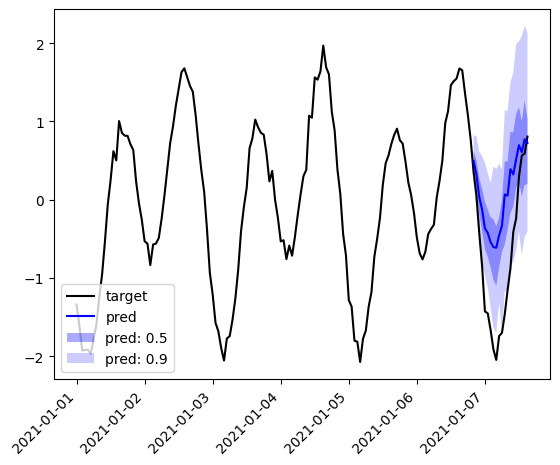

In [23]:
predictor = model.create_predictor(batch_size=BSZ)
forecasts = predictor.predict(test_data.input)

input_it = iter(test_data.input)
label_it = iter(test_data.label)
forecast_it = iter(forecasts)

inp = next(input_it)
label = next(label_it)
forecast = next(forecast_it)

plot_single(
    inp, 
    label, 
    forecast, 
    context_length=200,
    name="pred",
    show_label=True,
)
plt.show()